In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install sqlalchemy psycopg2



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, text


In [6]:
df = pd.read_csv('Downloads/Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [9]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [10]:
username ='postgres'
password = 'admin'
host = 'localhost'
port = 5432
db_name = 'postgres'

In [11]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db_name}')

In [12]:
connection = engine.connect()


In [13]:
df.to_sql('emp_table', engine, if_exists='replace', index=False)

# engine.dispose()

950

In [14]:
query = """
SELECT DATE_TRUNC('month', TO_DATE("Order Date", 'YYYY-MM-DD')) AS month, 
       SUM("Sales") AS total_revenue
FROM emp_table
GROUP BY DATE_TRUNC('month', TO_DATE("Order Date", 'YYYY-MM-DD'))
ORDER BY month;
"""


In [15]:
result = pd.read_sql(query, engine)
print(result)

                       month  total_revenue
0  2018-12-31 23:00:00+00:00   1.813586e+06
1  2019-01-31 23:00:00+00:00   2.202022e+06
2  2019-02-28 23:00:00+00:00   2.807100e+06
3  2019-03-31 23:00:00+00:00   3.390670e+06
4  2019-04-30 23:00:00+00:00   3.152607e+06
5  2019-05-31 23:00:00+00:00   2.577802e+06
6  2019-06-30 23:00:00+00:00   2.647776e+06
7  2019-07-31 23:00:00+00:00   2.244468e+06
8  2019-08-31 23:00:00+00:00   2.097560e+06
9  2019-09-30 23:00:00+00:00   3.736727e+06
10 2019-10-31 23:00:00+00:00   3.199603e+06
11 2019-11-30 23:00:00+00:00   4.613443e+06
12 2019-12-31 23:00:00+00:00   8.670290e+03


In [16]:
result["month"] = pd.to_datetime(result["month"])
result

,month,total_revenue
0,2018-12-31 23:00:00+00:00,1.813586e+06
1,2019-01-31 23:00:00+00:00,2.202022e+06
2,2019-02-28 23:00:00+00:00,2.807100e+06
3,2019-03-31 23:00:00+00:00,3.390670e+06
4,2019-04-30 23:00:00+00:00,3.152607e+06
5,2019-05-31 23:00:00+00:00,2.577802e+06
6,2019-06-30 23:00:00+00:00,2.647776e+06
7,2019-07-31 23:00:00+00:00,2.244468e+06
8,2019-08-31 23:00:00+00:00,2.097560e+06
9,2019-09-30 23:00:00+00:00,3.736727e+06


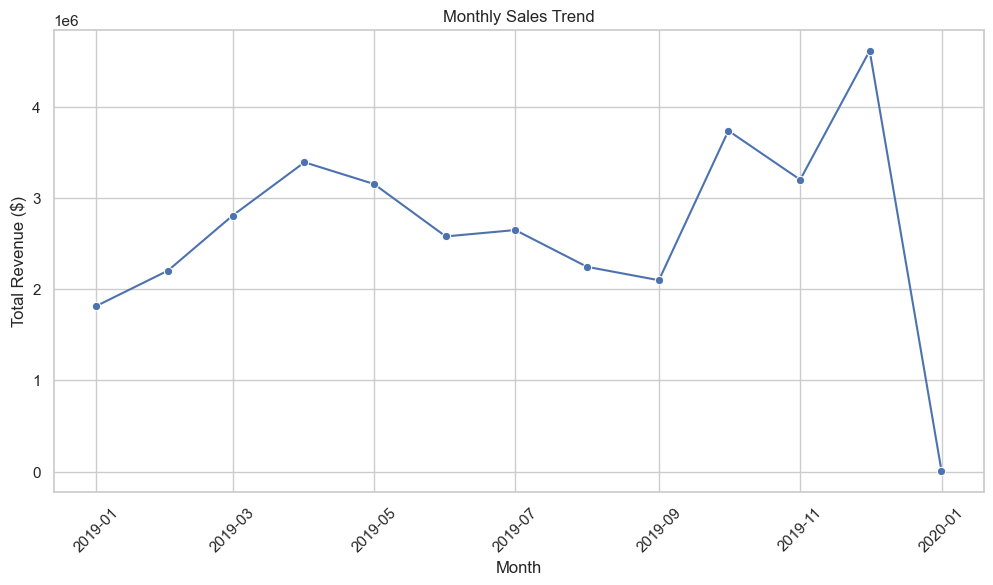

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="total_revenue", data=result, marker="o", color="b")

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [18]:
result.to_csv("sales_trends.csv", index=False)


In [19]:
query = """
SELECT DATE_TRUNC('month', TO_DATE("Order Date", 'YYYY-MM-DD')) AS month, 
       "Product"
FROM emp_table
GROUP BY month, "Product"
ORDER BY month;
"""


In [20]:
result_prod = pd.read_sql(query, engine)
print(result_prod)

                        month                     Product
0   2018-12-31 23:00:00+00:00  Bose SoundSport Headphones
1   2018-12-31 23:00:00+00:00                Google Phone
2   2018-12-31 23:00:00+00:00             Vareebadd Phone
3   2018-12-31 23:00:00+00:00            27in FHD Monitor
4   2018-12-31 23:00:00+00:00            Wired Headphones
..                        ...                         ...
238 2019-12-31 23:00:00+00:00  Bose SoundSport Headphones
239 2019-12-31 23:00:00+00:00      AAA Batteries (4-pack)
240 2019-12-31 23:00:00+00:00                Google Phone
241 2019-12-31 23:00:00+00:00            Wired Headphones
242 2019-12-31 23:00:00+00:00               Flatscreen TV

[243 rows x 2 columns]


In [21]:
result_prod["month"] = pd.to_datetime(result_prod["month"])


In [22]:
# Load the data from the database
query = 'SELECT * FROM emp_table'
df = pd.read_sql(query, engine)

# Step 1: Find the top-selling product per city
top_products = df.groupby("City").apply(lambda x: x.groupby("Product")["Sales"].sum().idxmax()).reset_index()
top_products.columns = ["City", "Highest_Selling_Product"]

# Step 2: Merge with the original DataFrame
df = df.merge(top_products, on="City", how="left")

C:\Users\FAVOUR\AppData\Local\Temp\ipykernel_10076\2402466728.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df.groupby("City").apply(lambda x: x.groupby("Product")["Sales"].sum().idxmax()).reset_index()


In [23]:
df.to_sql("emp_table", con=engine, if_exists="replace", index=False)


950

In [24]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Highest_Selling_Product
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Macbook Pro Laptop
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Macbook Pro Laptop
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Macbook Pro Laptop
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Macbook Pro Laptop
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Macbook Pro Laptop
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Macbook Pro Laptop
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,Macbook Pro Laptop
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Macbook Pro Laptop
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Macbook Pro Laptop


In [25]:
df = pd.read_sql('SELECT * FROM emp_table LIMIT 10;', engine)
df.head(35)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Highest_Selling_Product
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Macbook Pro Laptop
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Macbook Pro Laptop
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Macbook Pro Laptop
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Macbook Pro Laptop
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Macbook Pro Laptop
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22,Macbook Pro Laptop
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15,Macbook Pro Laptop
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9,Macbook Pro Laptop
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23,Macbook Pro Laptop
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11,Macbook Pro Laptop
